In [161]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat
import pandas as pd

In [162]:
Data = loadmat('data.mat')
data = Data['X']
data.shape

(51, 2)

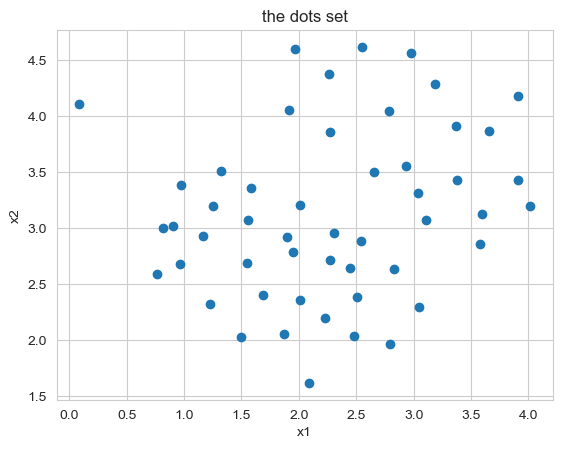

In [163]:
data_frame = pd.DataFrame(data, columns=['x1', 'x2'])

fig, ax = plt.subplots()
ax.scatter(data_frame['x1'], data_frame['x2'])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('the dots set')
plt.show()

K2 mean function

In [164]:
def k2_mean(data, centroid):
    return np.sqrt(np.sum(np.power(data - centroid, 2), axis=1))

step 1: Randomly initialize K cluster centroids

In [165]:
def initialize_cen(k, num_features):
    k_cens = np.random.randn(k, num_features)
    return k_cens

step 2:
    Repeat: {
        # first: assign points to the closest cluster centroid
        # second: move cluster centroids
        # until all centroid are
        }

In [166]:
def display_data(data, centroids_set, c):
    # Generate a color map for different clusters
    k = centroids_set.shape[0]  # Number of centroids (clusters)
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # Define a color list, you can extend it if k > 7
    
    # Plot each data point with the color corresponding to its assigned cluster
    for i in range(k):
        data_i = data[np.where(c.flatten() == i)[0], :]  # Points in cluster i
        plt.scatter(data_i[:, 0], data_i[:, 1], c=colors[i % len(colors)], label=f'Cluster {i+1}', alpha=0.6)
    
    # Plot the centroids
    plt.scatter(centroids_set[:, 0], centroids_set[:, 1], c='black', marker='x', s=100, label='Centroids')
    
    # Label the plot
    plt.title('K-Means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

In [167]:
def func(data, centroids_set):
    is_converged = False
    m = data.shape[0]          # the number of samples
    k = centroids_set.shape[0] # the number of cluster centroids
    c = np.matrix(np.zeros((m, 1))) # the cluster of each dot
    d = np.matrix(np.zeros((m, k))) # the distance for each dot to each cluster centroid
    
    while not is_converged:
        # first: assign points to the closest cluster centroid
        for i in range(k):
            d[:, i] = k2_mean(data, centroids_set[i]).reshape((m, 1))
            
        for i in range(m):
            c[i] = np.argmin(d[i])
        
        # second: move cluster centroids
        updated_centroids = np.copy(centroids_set)
        for i in range(0, k):
            data_i = data[np.where(c == i)[0], :]
            if len(data_i) > 0:
                updated_centroids[i] = np.mean(data_i, axis=0)
                
        display_data(data, updated_centroids, c)
        # 判断聚类中心是否更新
        if np.allclose(centroids_set, updated_centroids):
            is_converged = True
        else:
            centroids_set[:] = updated_centroids
            is_converged = False
    
    return centroids_set, c

In [170]:
centroids_set = np.array([[0.0, 0.0],
                          [1.0, 1.0]])
data.shape, centroids_set.shape

((51, 2), (2, 2))

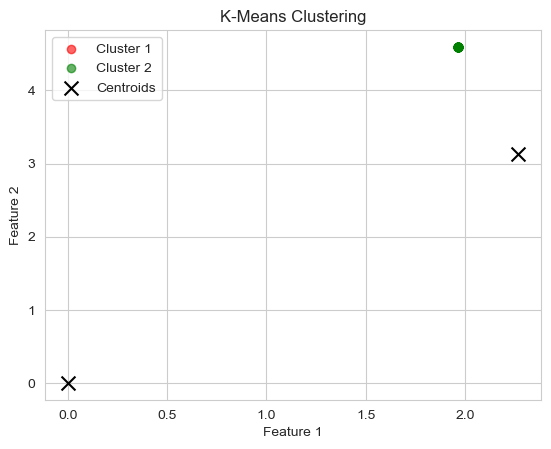

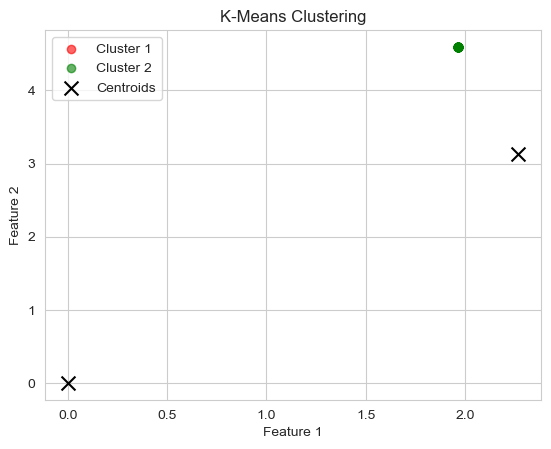

In [171]:
centroids_set, c = func(data, centroids_set)